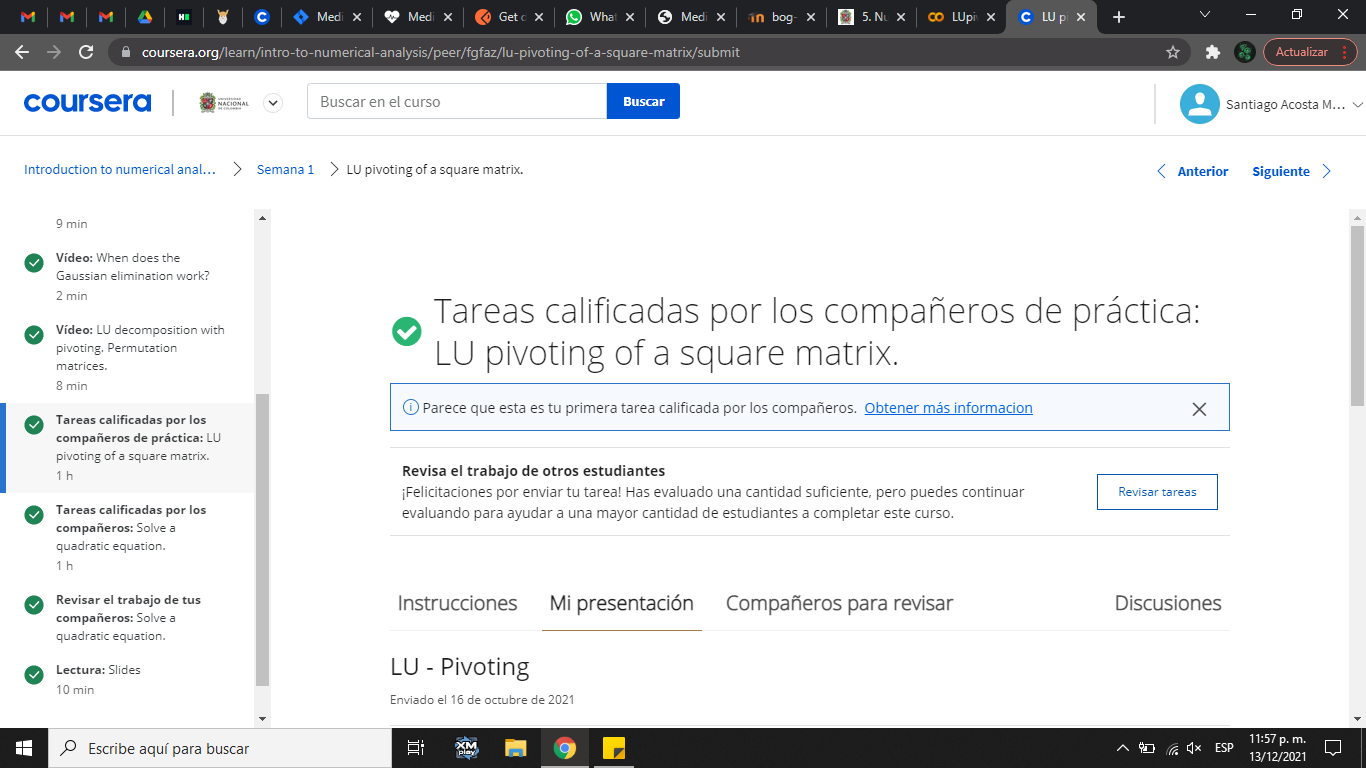

# I. $LU$ factorization of a square matrix
When we premultply $A$ by lower triangular elemetary matrices $\Lambda_j$ it is trasfrommed in an  upper triangular matrix $U$

$$  \Lambda_{n-1}  \ldots\Lambda_2  \Lambda_1 A  = U$$

$$  A  = (\Lambda_{n-1}  \ldots\Lambda_2  \Lambda_2 )^{-1} U$$

The inverse of a product of matrices is the revesre product of inverses
$$  A  = (\Lambda_1^{-1}  \Lambda_2^{-1} \ldots  \Lambda_{n-1}^{-1}) U$$

and inverse of a Lower Triangular Elemetary Matrix is minus the matrix $\Lambda_j^{-1} = - \Lambda_j$, so 

$$ A  =  (-\Lambda_1) (-\Lambda_2) \ldots   (-\Lambda_{n-1})  U$$

So the $LU$ column pivot factorization is 
$$  A  = L U$$
with
$$ U = \Lambda_{n-1}  \ldots\Lambda_2  \Lambda_1 A  $$
an upper triangular matrix
$$ L  =  \Lambda_1^{-1}  \Lambda_2^{-1} \ldots  \Lambda_{n-1}^{-1} m = (-\Lambda_1) (-\Lambda_2) \ldots   (-\Lambda_{n-1})  $$
an lower triangular matrix.

Consider a simple naive implementation of the LU decomposition. 

Note that we're using the `numpy` arrays to represent matrices [do **not** use `np.matrix`].

In [1]:
import numpy as np

def diy_lu(a):
    """Construct the LU decomposition of the input matrix.
    
    Naive LU decomposition: work column by column, accumulate elementary triangular matrices.
    No pivoting.
    """
    N = a.shape[0]
    
    u = a.copy()
    L = np.eye(N)
    for j in range(N-1):
        lam = np.eye(N)
        gamma = u[j+1:, j] / u[j, j]
        lam[j+1:, j] = -gamma
        u = lam @ u

        lam[j+1:, j] = gamma
        L = L @ lam
    return L, u

In [2]:
# Now, generate a full rank matrix and test the naive implementation

import numpy as np

N = 6
A = np.zeros((N, N), dtype=float)
for i in range(N):
    for j in range(N):
        A[i, j] = 3. / (0.6*i*j + 1)

np.linalg.matrix_rank(A)

6

In [3]:
np.round(A,3)

array([[3.   , 3.   , 3.   , 3.   , 3.   , 3.   ],
       [3.   , 1.875, 1.364, 1.071, 0.882, 0.75 ],
       [3.   , 1.364, 0.882, 0.652, 0.517, 0.429],
       [3.   , 1.071, 0.652, 0.469, 0.366, 0.3  ],
       [3.   , 0.882, 0.517, 0.366, 0.283, 0.231],
       [3.   , 0.75 , 0.429, 0.3  , 0.231, 0.188]])

In [4]:
L, U = diy_lu(A)

print(np.round(L,3), "\n")
print(np.round(U,3), "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print(np.round(L@U - A,3))

[[1.    0.    0.    0.    0.    0.   ]
 [1.    1.    0.    0.    0.    0.   ]
 [1.    1.455 1.    0.    0.    0.   ]
 [1.    1.714 1.742 1.    0.    0.   ]
 [1.    1.882 2.276 2.039 1.    0.   ]
 [1.    2.    2.671 2.944 2.354 1.   ]] 

[[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -1.125e+00 -1.636e+00 -1.929e+00 -2.118e+00 -2.250e+00]
 [ 0.000e+00  0.000e+00  2.630e-01  4.570e-01  5.970e-01  7.010e-01]
 [ 0.000e+00  0.000e+00  0.000e+00 -2.200e-02 -4.500e-02 -6.500e-02]
 [ 0.000e+00 -0.000e+00  0.000e+00  0.000e+00  1.000e-03  2.000e-03]
 [ 0.000e+00  0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00]] 

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0. -0.]
 [ 0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0. -0. -0.  0.]
 [ 0.  0. -0. -0.  0.  0.]]


# II. The need for pivoting

Let's tweak the matrix a little bit, we only change a single element:

In [5]:
A1 = A.copy()
A1[1, 1] = 3

In [6]:
np.round(A1,3)

array([[3.   , 3.   , 3.   , 3.   , 3.   , 3.   ],
       [3.   , 3.   , 1.364, 1.071, 0.882, 0.75 ],
       [3.   , 1.364, 0.882, 0.652, 0.517, 0.429],
       [3.   , 1.071, 0.652, 0.469, 0.366, 0.3  ],
       [3.   , 0.882, 0.517, 0.366, 0.283, 0.231],
       [3.   , 0.75 , 0.429, 0.3  , 0.231, 0.188]])

In [7]:
np.linalg.matrix_rank(A1)

6

In [8]:
L, U= diy_lu(A1)

print(L, U)

[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]] [[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


The LU decomposition from scipy.linalg.lu already implements pivoting other sophisticated controls 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html

$$A = P L U$$

```python

 P ,  L,  U  = scipy.linalg.lu(a, permute_l=False, overwrite_a=False, check_finite=True)

# Returns
# (If permute_l == False)
# P : Permutation matrix
# L : Lower triangular or trapezoidal matrix with unit diagonal. K = min
# U : Upper triangular or trapezoidal matrix
```

In [9]:
from scipy import linalg
P ,  L,  U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",np.round(U,3), "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")


P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.         0.         0.         0.         0.         0.        ]
 [1.         1.         0.         0.         0.         0.        ]
 [1.         0.5        1.         0.         0.         0.        ]
 [1.         0.72727273 0.70588235 1.         0.         0.        ]
 [1.         0.85714286 0.40993789 0.83482143 1.         0.        ]
 [1.         0.94117647 0.17849899 0.4255677  0.78870221 1.        ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -3.510e-01 -5.790e-01 -7.330e-01 -8.440e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  2.400e-02  4.900e-02  7.000e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.000e-03 -2.000e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]] 

A= P@L@U
 [[3.         3.   

In [10]:
P ,  L,  U = linalg.lu(A1)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",np.round(U,3), "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")


P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[ 1.          0.          0.          0.          0.          0.        ]
 [ 1.          1.          0.          0.          0.          0.        ]
 [ 1.         -0.          1.          0.          0.          0.        ]
 [ 1.          0.72727273  0.1512605   1.          0.          0.        ]
 [ 1.          0.85714286  0.08784383  0.51421669  1.          0.        ]
 [ 1.          0.94117647  0.03824978  0.2076544   0.64143198  1.        ]] 

U
 [[ 3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00  3.000e+00]
 [ 0.000e+00 -2.250e+00 -2.571e+00 -2.700e+00 -2.769e+00 -2.812e+00]
 [ 0.000e+00  0.000e+00 -1.636e+00 -1.929e+00 -2.118e+00 -2.250e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 -9.200e-02 -1.480e-01 -1.860e-01]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  2.000e-03  4.000e-03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e

### Test II.1

For a naive LU decomposition to work, all leading minors of a matrix should be non-zero. Check if this requirement is satisfied for the two matrices `a` and `a1`.

(20% of the grade)

In [18]:
def leading_minors_test(A):
   """
    Function to check all leading Minors of a Matrix not equal to 0
    False if it has leading minors equal to 0.
    Falso si contiene 'leading minors' iguales a 0.
   """
   for i in range(A.shape[0]):
     subMatrix = A[0:i,0:i]
     if np.linalg.det( subMatrix ) == 0:
       return False
   return True

leading_minors_test(A), leading_minors_test(A1)

(True, False)

### Test II.2

Modify the `diy_lu` routine to implement column pivoting. Keep track of pivots, you can either construct a permutation matrix, or a swap array (your choice).

(40% of the grade)

Implement a function to reconstruct the original matrix from a decompositon. Test your routines on the matrices `a` and `a1`.

(40% of the grade)

# 2. $LU$ factorization column pivoting and reconstruction
When we premultply $A$ by elementary permutation matricex$P_j$( to find a good pivot) and then premultply by lower triangular elemetary matrices $\Lambda_j$, $A$  it is transformed in an  upper triangular matrix $U$

$$  
(\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1)A  = U
$$
and 
$$  
A  = (\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1)^{-1} U
$$


So the $LU$ column pivot factorization of $A$ is 
$$
A = LU
$$
ith
$$  
U = (\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1) A
$$
$$
\begin{array}{ll}L  &=  (\Lambda_{n-1} P_{n-1} \ldots \Lambda_2 P_2 \Lambda_1 P_1)^{-1}\\
&= P_1^{-1} \Lambda_1^{-1} P_2^{-1} \Lambda_2^{-1} \ldots  P_{n-1}^{-1}\\
 &= P_1^{t} (-\Lambda_1) P_2^{t} (-\Lambda_2) \ldots  P_{n-1}^{t} (-\Lambda_{n-1})
\end{array}
$$
because the inverse a of a Lower Triangular Elemetary Matrix is minus the matrix $\Lambda_i^{-1} = - \Lambda_i$ and the inverse of a Permutation Matrix (in particular an elementary permutation matrix)  is its transpose [math.stackexchange](
        https://math.stackexchange.com/questions/98549/the-transpose-of-a-permutation-matrix-is-its-inverse#:~:text=Taking%20the%20transpose%20of%20P,Pt%3DP%E2%88%921.)  $P_i^{-1}=P_i^{t}$.

Note that 
$$
L= P_1^{t} (-\Lambda_1) P_2^{t} (-\Lambda_2) \ldots  P_{n-1}^{t} (-\Lambda_{n-1})
$$
is not exactly a lower tiangular matrix but a row permutated lower tiangular matrix.





$$PA = LU$$

In [26]:
from math import fabs
def diy_lu_column_pivot_reconstruct(A):
    """Construct the LU decomposition of the input matrix.
    Naive LU decomposition: work column by column, accumulate elementary triangular matrices.
    With pivoting.
    """
    N = A.shape[0]  # shape: Returns the dimensions of an array
                    # shape: Retorna la dimension de una array/matriz
    u = A.copy()
    L = np.eye(N)   # eye: Returns a 2-D array with 1's on the diagonal
                    # and 0´s elsewhere ; Retorna una matriz identidad

    P = np.eye(N)   # Permutation Matrix ; Matriz de Permutacion

    for j in range(N-1):
        # Pivoting u matrix
        pivotValue = 0
        pivotIndex = -1

        for row in range(j, len(u)):
            if fabs(u[row][j]) > pivotValue:     # fabs: floating-absolute
                pivotValue = fabs(u[row][j])
                pivotIndex = row
        
        if pivotValue != 0:
            u_copy = u.copy()
            L_copy = L.copy()

            # Permutation Matrix Operations
            P_temp = np.eye(N)
            P_copy = P_temp.copy()

            # Pivoting
            L[j, :j], L[pivotIndex, :j] = L_copy[pivotIndex, :j], L_copy[j, :j]
            u[j], u[pivotIndex] = u_copy[pivotIndex], u_copy[j]
            P_temp[j], P_temp[pivotIndex] = P_copy[pivotIndex], P_copy[j]

            P = P@P_temp

        # resume
        lam = np.eye(N)
        gamma = u[j+1:, j] / u[j, j] 
        lam[j+1:, j] = -gamma
        u = lam @ u                     # @ : Matrix Multiplication

        lam[j+1:, j] = gamma

        L = L @ lam

    return P, L, u

In [27]:
A = np.array([[4,3,1], [5,7,0], [9,9,3]])

P, L, U, = diy_lu_column_pivot_reconstruct(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] 

L
 [[ 1.          0.          0.        ]
 [ 0.55555556  1.          0.        ]
 [ 0.44444444 -0.5         1.        ]] 

U
 [[ 9.          9.          3.        ]
 [ 0.          2.         -1.66666667]
 [ 0.          0.         -1.16666667]] 

A= P@L@U
 [[4. 3. 1.]
 [5. 7. 0.]
 [9. 9. 3.]] 

A
 [[4 3 1]
 [5 7 0]
 [9 9 3]] 

L@u - A
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [28]:
from scipy import linalg

A = np.array([[4,3,1], [5,7,0], [9,9,3]])

P,L,U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] 

L
 [[ 1.          0.          0.        ]
 [ 0.55555556  1.          0.        ]
 [ 0.44444444 -0.5         1.        ]] 

U
 [[ 9.          9.          3.        ]
 [ 0.          2.         -1.66666667]
 [ 0.          0.         -1.16666667]] 

A= P@L@U
 [[4. 3. 1.]
 [5. 7. 0.]
 [9. 9. 3.]] 

A
 [[4 3 1]
 [5 7 0]
 [9 9 3]] 

L@u - A
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [29]:
N = 6
A = np.zeros((N, N), dtype=float)
for i in range(N):
    for j in range(N):
        A[i, j] = 3. / (0.6*i*j + 1)

P, L, U, = diy_lu_column_pivot_reconstruct(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")




P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.         0.         0.         0.         0.         0.        ]
 [1.         1.         0.         0.         0.         0.        ]
 [1.         0.5        1.         0.         0.         0.        ]
 [1.         0.72727273 0.70588235 1.         0.         0.        ]
 [1.         0.85714286 0.40993789 0.83482143 1.         0.        ]
 [1.         0.94117647 0.17849899 0.4255677  0.78870221 1.        ]] 

U
 [[ 3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00 -2.25000000e+00 -2.57142857e+00 -2.70000000e+00
  -2.76923077e+00 -2.81250000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.50649351e-01 -5.78571429e-01
  -7.33031674e-01 -8.43750000e-01]
 [ 0.00000000e+00  0.00000000e+00  2.77555756e-17  2.42136380e-02
   4.86615163e-02  6.96142093e-02]
 [ 0.00000000e+00  2.22044605e-16 -2.3170

In [30]:
from scipy import linalg

P,L,U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.         0.         0.         0.         0.         0.        ]
 [1.         1.         0.         0.         0.         0.        ]
 [1.         0.5        1.         0.         0.         0.        ]
 [1.         0.72727273 0.70588235 1.         0.         0.        ]
 [1.         0.85714286 0.40993789 0.83482143 1.         0.        ]
 [1.         0.94117647 0.17849899 0.4255677  0.78870221 1.        ]] 

U
 [[ 3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00 -2.25000000e+00 -2.57142857e+00 -2.70000000e+00
  -2.76923077e+00 -2.81250000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.50649351e-01 -5.78571429e-01
  -7.33031674e-01 -8.43750000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.42136380e-02
   4.86615163e-02  6.96142093e-02]
 [ 0.00000000e+00  0.00000000e+00  0.0000

In [31]:
A[1, 1] = 3

P, L, U, = diy_lu_column_pivot_reconstruct(A1)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[1.         0.         0.         0.         0.         0.        ]
 [1.         1.         0.         0.         0.         0.        ]
 [1.         0.         1.         0.         0.         0.        ]
 [1.         0.72727273 0.1512605  1.         0.         0.        ]
 [1.         0.85714286 0.08784383 0.51421669 1.         0.        ]
 [1.         0.94117647 0.03824978 0.2076544  0.64143198 1.        ]] 

U
 [[ 3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00 -2.25000000e+00 -2.57142857e+00 -2.70000000e+00
  -2.76923077e+00 -2.81250000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.63636364e+00 -1.92857143e+00
  -2.11764706e+00 -2.25000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.77555756e-17 -9.24730366e-02
  -1.48456245e-01 -1.85637892e-01]
 [ 0.00000000e+00  2.22044605e-16 -1.4272

In [32]:
from scipy import linalg

P,L,U = linalg.lu(A)

print("P\n",P, "\n")
print("L\n",L, "\n")
print("U\n",U, "\n")
print("A= P@L@U\n", P@L@U, "\n")
print("A\n",A, "\n")

# Quick sanity check: L times U must equal the original matrix, up to floating-point errors.
print("L@u - A\n",np.round(P@L@U-A,3), "\n")

P
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]] 

L
 [[ 1.          0.          0.          0.          0.          0.        ]
 [ 1.          1.          0.          0.          0.          0.        ]
 [ 1.         -0.          1.          0.          0.          0.        ]
 [ 1.          0.72727273  0.1512605   1.          0.          0.        ]
 [ 1.          0.85714286  0.08784383  0.51421669  1.          0.        ]
 [ 1.          0.94117647  0.03824978  0.2076544   0.64143198  1.        ]] 

U
 [[ 3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
   3.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00 -2.25000000e+00 -2.57142857e+00 -2.70000000e+00
  -2.76923077e+00 -2.81250000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.63636364e+00 -1.92857143e+00
  -2.11764706e+00 -2.25000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.24730366e-02
  -1.48456245e-01 -1.85637892e-01]
 [ 0.